In [27]:
import gzip
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats
import random
from numpy import linalg as LA
from sklearn.metrics import confusion_matrix, f1_score

def load_fashion_mnist():
    """
    Loads Fashion MNIST dataset.
    
    Adapted from: https://github.com/zalandoresearch/fashion-mnist/blob/master/utils/mnist_reader.py
    """
    TRAIN_IMAGES = 'train-images-idx3-ubyte.gz'
    TRAIN_LABELS = 'train-labels-idx1-ubyte.gz'    
    TEST_IMAGES = 't10k-images-idx3-ubyte.gz'
    TEST_LABELS = 't10k-labels-idx1-ubyte.gz'

    with gzip.open(TRAIN_LABELS, 'rb') as tr_labels_file, gzip.open(TEST_LABELS, 'rb') as ts_labels_file:
        train_labels = np.frombuffer(tr_labels_file.read(), dtype=np.uint8, offset=8)
        test_labels = np.frombuffer(ts_labels_file.read(), dtype=np.uint8, offset=8)

    with gzip.open(TRAIN_IMAGES, 'rb') as tr_images_file, gzip.open(TEST_IMAGES, 'rb') as ts_images_file:
        train_images = np.frombuffer(tr_images_file.read(), dtype=np.uint8, offset=16).reshape(len(train_labels), 784)
        test_images = np.frombuffer(ts_images_file.read(), dtype=np.uint8, offset=16).reshape(len(test_labels), 784)

    return train_images, train_labels, test_images, test_labels

In [28]:
def pretty_print(image_example):
    """ Pretty prints a Fashion MNIST example.

    Parameters:
        image_example: a 1x784 numpy array corresponding to the features of
                       a single image.

    Returns:
        None.
    """
    print(np.array_str(image_example, precision=1, max_line_width=116))


In [29]:
def usage_example():
    """ Example of how to load and parse Fashion MNIST data. """
    
    train_images, train_labels, test_images, test_labels = load_fashion_mnist()

    # train_images is a 60,000 x 784 numpy matrix. There are 60k
    # rows in the matrix, each row corresponding to a single example.
    # There are 784 columns, each corresponding to the value of a
    # single pixel in the 28x28 image after it has been "flattened".
    print("Dimensions of training set feature matrix:", train_images.shape)

    # The labels for each example are maintained separately in train_labels.
    # This is a 60,000 x 1 numpy matrix, where each element is the label
    # for the corresponding training example.
    print("Dimensions of training set label matrix:", train_labels.shape)

    # Example of how to access a individual training example (in this case,
    # we pick an example at a random index). We could use print to output the
    # raw pixel values to the screen, but pretty_print formats the data in 
    # a nicer way: if you squint, you may be able to make out the contours of
    # the fashion article in the matrix data.
    EXAMPLE_INDEX = np.random.randint(60000)
    print("Features of training example at index {}:\n".format(EXAMPLE_INDEX))
    pretty_print(train_images[EXAMPLE_INDEX])

    # And here's the label that goes with that training example
    print("\nLabel of training example at index {}:".format(EXAMPLE_INDEX), train_labels[EXAMPLE_INDEX], '\n')


    # Finally, let's visualize the example we've picked as a 28x28 image
    plt.figure()
    plt.imshow(train_images[EXAMPLE_INDEX].reshape(28, 28))
    plt.show()
    
    # The test_images/test_labels are organized in the same way, but only contain 10k
    # examples. Don't touch this data until your model is frozen! Perform all
    # cross-validation, model selection, hyperparameter tuning etc. on the 60k
    # training set. Use the test set simply for reporting performance.


Dimensions of training set feature matrix: (60000, 784)
Dimensions of training set label matrix: (60000,)
Features of training example at index 4279:

[  0   0   0   0   0   0   0   1   0   0   0  68  81 113 121 109  65   0   0   0   2   1   0   0   0   0   0   0
   0   0   0   0   0   3   0   0   0   0 148 233 229 233 228 234 248 108   0   0   0   0   3   0   0   0   0   0
   0   0   0   0   0   0   0  82 184 237 215 220 230 219 222 238 233 225 246 169  71   0   0   0   0   0   0   0
   0   0   0   0   0  60 204 226 226 221 194 219 232 228 231 243 227 184 207 224 223 192  44   0   0   0   0   0
   0   0   0   0   0 189 222 208 212 183 191 204 236 240 239 244 201 200 192 203 196 211 173   0   0   0   0   0
   0   0   0   0  34 217 200 208 236 220 201 206 213 244 248 213 187 201 169 213 201 184 205  30   0   0   0   0
   0   0   0   0  90 221 203 211 205 238 230 195 193 252 242 179 187 192 208 208 199 184 205  98   0   0   0   0
   0   0   0   0 127 223 201 210 212 204 226 200 117 237 2

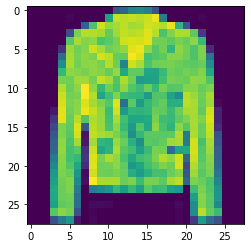

In [30]:
usage_example()

In [31]:
# Preprocessing, scaling

train_images, train_labels, test_images, test_labels = load_fashion_mnist()

train_images[10]




array([  0,   0,   0,   0,   0,   0,   0,  11, 142, 200, 106,   0,   0,
         0,   0,   0,   0,   0,  85, 185, 112,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0, 152, 214, 217, 194, 236,
       216, 187, 149, 135, 153, 211, 217, 231, 205, 217, 188,  34,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,  66, 185, 166, 180,
       181, 190, 211, 221, 197, 146, 198, 206, 191, 168, 190, 172, 188,
       175,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 135, 153,
       160, 175, 180, 170, 186, 187, 190, 188, 190, 187, 174, 195, 185,
       174, 161, 175,  59,   0,   0,   0,   0,   0,   0,   0,   0,   0,
       161, 147, 160, 170, 178, 177, 180, 168, 173, 174, 171, 185, 184,
       185, 172, 171, 164, 174, 120,   0,   0,   0,   0,   0,   0,   0,
         0,   2, 175, 146, 145, 168, 178, 181, 185, 180, 184, 178, 179,
       187, 191, 193, 190, 181, 171, 172, 158,   0,   0,   0,   0,   0,
         0,   0,   0,  35, 177, 155, 140, 151, 172, 191, 187, 18

In [32]:
def compute_distances(train_X, test_example):
    """
    Returns a vector of the distances between the given test_example
    and every training example in the matrix train_X.
    
    Parameters:
        train_X - an nx3 matrix, containing n training examples
        test_examples - a 1x3 vector containing a test example to classify
        
    Returns:
        An nx1 matrix containing the distances from test_example to all the
        examples in train_X.
    """
    # print(LA.norm(- train_X + np.asarray(test_example), ord = 1, axis = 1))
    
    return LA.norm(- train_X + np.asarray(test_example), ord = 1, axis = 1)
    


In [33]:
def predict_one(distances, y_train, k):
    """
    Given a vector of distances between a test example and all the training examples,
    makes a prediction using a majority vote of k nearest neighbors.
    
    Parameters:
        distances - an nx1 matrix containing the distances from a test example to
                    all training examples.
        train_y - an nx1 matrix containing the true labels
        k - the number of neighbors participating in the prediction
        
    Returns:
        A classification for the test example in question (i.e., either a 0 or a 1).
    """
    min_indexes = np.argpartition(distances,k)[:k]
    class_mode = stats.mode(y_train[min_indexes]).mode[0]
    return class_mode

In [34]:
def predict_all(X_train, y_train, X_test, k):
    """
    Makes a k-NN prediction for every example in X_test, using (X_train, y_train).
    
    Parameters:
        X_train - matrix of training data
        y_train - vector of training labels
        X_test - matrix of test data to be classified
        k - the number of nearest neighbors participating in the classification.
        
    Returns:
        An nx1 matrix of predictions for every test case.
    """
    # no modification necessary
    y_preds = []
    for _, ex in X_test.iterrows():
        distances = compute_distances(X_train, ex)
        y_preds.append(predict_one(distances, y_train, k))
    return y_preds

In [35]:


def grid_search(y_test, X_train, y_train, X_test):
    scores = []
    for i in k_range:
        y_preds = predict_all(X_train, y_train, X_test, i)
        scores.append(f1_score(y_test, y_preds))
    return scores



In [36]:
# Implementing a very similar KNN model to our sample assignment, we get a relatively high accuracy rate indentifying the correct clothing article. To test for hyperparameter K,
# we will plot the accuracy of the model after [0] to [test_labels.size] predictions to see how many training examples are required to reach a good estimate for the accuracy, 
# that way we don't have to run 10000 examples to find the model's accuracy for each value of k because the data is far too large to use O(test_labels.size*K) runtime.

#https://stackoverflow.com/questions/37794849/efficient-and-precise-calculation-of-the-euclidean-distance
# def eudis5(v1, v2):
# dist = [(a - b)**2 for a, b in zip(v1, v2)]
# dist = math.sqrt(sum(dist))
# return dist

In [58]:


def find_accuracy(train_images, test_images, train_labels, test_labels, n, k):
    test_len = test_labels.size
    predictions = 0
    correct = 0
    for i in range(0,num_predictions):
        test_index = random.randint(0, test_len)
        prediction = predict_one(compute_distances(train_images, test_images[test_index]), train_labels, int(k))
        predictions = predictions + 1

        if (prediction == test_labels[test_index]):
            correct = correct + 1

    return (100 * correct) / predictions

def round_up_to_odd(f):
        f = int(np.ceil(f))
        return f + 1 if f % 2 == 0 else f

def get_best_k(accuraciesArr, num_predictions, numk):
    # Log k vals
    log_vals = np.logspace(0, 3.5, num=numk)
    k_vals = []
    
    
    for val in log_vals:
        k_vals =  np.append(k_vals, round_up_to_odd(val))

    k_vals = list(set(k_vals))
    
    for k in k_vals:
        accuracy = find_accuracy(train_images, test_images, train_labels, test_labels, num_predictions, k)
        accuraciesArr = np.append(accuraciesArr, accuracy)
        print('k: ', k, '  accuracy: ', accuracy)
        test_len = test_labels.size
    
    return accuraciesArr, 


num_predictions = 20
accuraciesArr = []

accuraciesArr = get_best_k([], num_predictions, 25)
print(accuraciesArr)
print(max(accuraciesArr))


k:  1.0   accuracy:  50.0
k:  3.0   accuracy:  65.0
k:  1155.0   accuracy:  55.0
k:  5.0   accuracy:  80.0
k:  7.0   accuracy:  75.0
k:  9.0   accuracy:  60.0
k:  11.0   accuracy:  55.0
k:  15.0   accuracy:  75.0
k:  21.0   accuracy:  60.0
k:  155.0   accuracy:  85.0
k:  29.0   accuracy:  65.0
k:  423.0   accuracy:  65.0
k:  41.0   accuracy:  85.0
k:  303.0   accuracy:  55.0
k:  57.0   accuracy:  70.0
k:  827.0   accuracy:  55.0
k:  79.0   accuracy:  65.0
k:  591.0   accuracy:  45.0
k:  1617.0   accuracy:  55.0
k:  2261.0   accuracy:  40.0
k:  217.0   accuracy:  75.0
k:  3163.0   accuracy:  65.0
k:  111.0   accuracy:  75.0
[50. 65. 55. 80. 75. 60. 55. 75. 60. 85. 65. 65. 85. 55. 70. 55. 65. 45.
 55. 40. 75. 65. 75.]


In [60]:
print(max(enumerate(accuraciesArr)))

(22, 75.0)


/opt/conda/envs/common/lib/python3.7/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


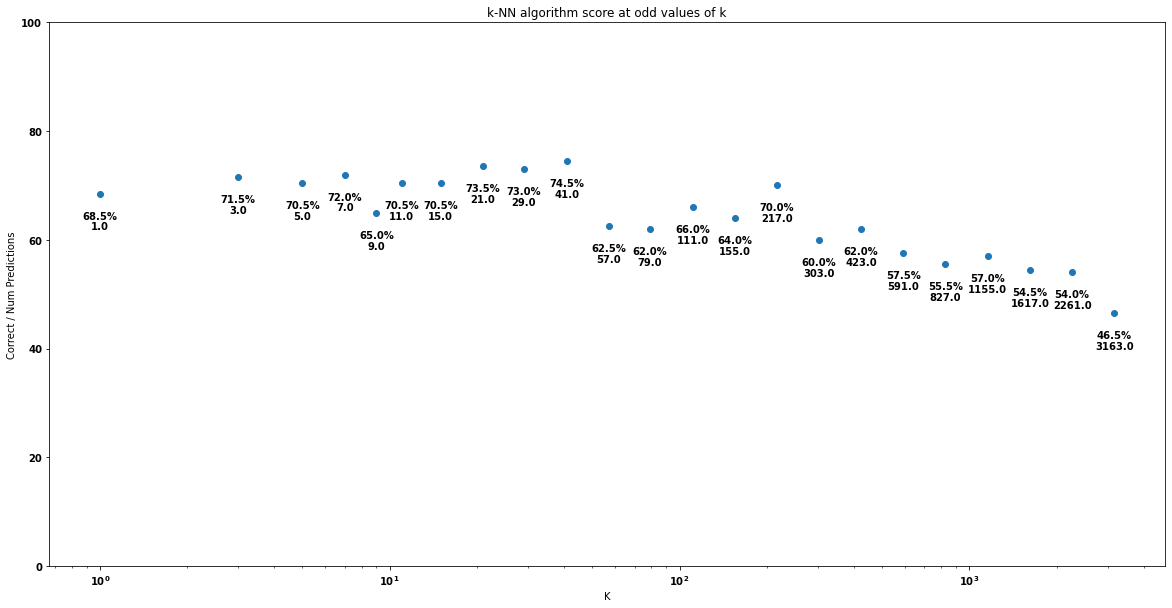

In [53]:
plt.xlabel("K")
plt.ylabel("Correct / Num Predictions")
plt.xscale("log")
plt.title("k-NN algorithm score at odd values of k")
axes = plt.axes()
axes.set_ylim([0, 100])
plt.scatter(k_vals, accuraciesArr)

for i, label in enumerate(k_vals):
    plt.annotate(str(accuraciesArr[i]) + "%"
                 , (label, accuraciesArr[i]-5)
                , horizontalalignment = 'center'
                , verticalalignment = 'bottom')
    
    plt.annotate(k_vals[i]
                 , (label, accuraciesArr[i]-7)
                , horizontalalignment = 'center'
                , verticalalignment = 'bottom')
    
    
    
#https://stackoverflow.com/questions/3899980/how-to-change-the-font-size-on-a-matplotlib-plot
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 8}

plt.rc('font', **font)


#import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,10)
plt.show()